# Praktikum Informationstechnik im Maschinenbau II
## P12 - Machine Learning mit Python - Weitere Verfahren

Das folgende PT ist eine recht einfache Einführung in die Grundlagen des Maschinellen Lernens (ML). 
Hierzu wird ein Tutorial aus dem Buch: „Machine Learning mit Python und Scikit-Learn und Tensorflow“ (ISBN 978-1-78712-593-3) abgeändert. Das Buch ist als englische ebook-Version in der Bibliothek erhältlich, bzw. steht im ilias Kurs zur Verfügung.
Eine typische Anwendung von ML-Algorithmen ist die Klassifizierung von Daten, d.h. Datensätze (Muster) werden nach bestimmten
Kriterien bewertet und einer Klasse, also einer Menge gleichartiger Objekte, zugeordnet. So können z.B. unterschiedliche Zustände von
Maschinen oder Werkzeugen diagnostiziert werden. Auch die Sprach- bzw. Bilderkennung basiert auf diesen Verfahren.
Im Folgenden sollen verschiedene Gattungen von Blumen (Iris) aufgrund von Merkmalen unterschieden werden.

### Problemstellung
Bild 1 zeigt eine typische Irisblüte, die man durch die Länge und Breite ihrer Kelch- und Blütenblätter unterscheiden kann.
Jeder Datensatz besteht aus einer durchgängigen Nummerierung, vier Merkmalen und einer Zuordnung zu einer der Gattungen (Klassen).
Der erste Datensatz des sog. „Iris data sets“ kann daher als Array mit sechs Einträgen erzeugt werden.
Es soll eine Musterklassifikation erstellt werden, die zwei bzw. alle drei Iris Sorten (setosa, versicolor, viriginica) anhand ihrer
Kelch- und Blütenblätter unterscheiden.
![](ML_Iris01.png) 

## Aufgabe 1 - Anwendung der "Logistic Regression"

1. Datensatz von Webseite einlesen und Ändern der Spalte `species` in "category"
2. Vorverarbeitung des Datensatzes (Standardisierung)
3. Trainieren eine Perceptrons und Prüfung des Ergebnisses

### Teilschritt 1: Datensatz von Webseite einlesen und Ändern der Spalte `species` in "category"

In [1]:
# Lösungsteile können Sie aus P11_A2 übernehmen 
# Standard-Imports (numpy, matplotlib, pandas)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
# StandardScaler und Hilfsprogramm train_test_split importieren
from sklearn.model_selection import train_test_split 
# plot_decision_regions aus plot_decision_regions.py importieren
from plot_decision_regions import plot_decision_regions
# Einlesen in Dataframe (die Spalten sollen 'sl', 'sw', 'pl', 'pw' und 'species' heißen)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sl', 'sw', 'pl', 'pw', 'species'], header= None)
df
# Umwandeln der Spalte "species" in Datentyp category
df.species = df.species.astype('category')

iris = load_iris()

In [2]:
# Standardeinstellungen
# Wählen Sie hier zwei Features aus (zu Beginn ['sl', 'pl']). Schreiben Sie Ihr Programm so, dass die Auswahl durchgängig verwendet wird
features = 
# Wählen Sie das Verhältnis Test/Trainingsdaten (30% Test)
test_size =  

SyntaxError: invalid syntax (3011829617.py, line 3)

### Teilschritt 2: Extraktion der Featerurematrix und ggf. Standardisierung
- Herausziehen der Features aus dem DataFrame und Wandeln in numpy-Array
- Herausziehen der Labels
- Aufteilung des Datensatzes in Trainings- und Testdaten

>Prüfen Sie, ob durch Standardisierung Verbesserungen erzielt werden

In [3]:
# Spalten für Feature-Matrix auswählen und in numpy-Array wandeln (Variable features benutzen!)
X = iris.data[:150, [1,3]] #pl pw
# Labels (codes der Spalte species) in numpy-Array wandeln
Y = iris.target[:150]
# Testausgabe
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

In [4]:
# Anwendung des Standardscalers auf den Datensatz
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
# Kommentieren Sie die folgende Zeile aus, wenn Sie mit den nicht skalierten Rohdaten arbeiten wollen
X = X_std 

In [5]:
# Aufsplitten von X in X_train und X_test und y in y_train und y_test im Verhältnis test_size mittels Hilfsfunktion train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

## Hinweis

- Die Teilschritte 1 und 2 sind für alle Aufgaben dieses Praktikums identisch
- Teilschritt 3 (und ggf. 4) sind unterschiedlich

### Teilschritt 3: Anwendung der Logistic Regression als Klassifikator

Als Alternative zum Perzeptron als Klassifikator sollen nun andere Methoden, die in sklearn zur 
Verfügung stehen, getestet werden. 

Klassifizieren Sie den Iris Datensatz aus sklearn mit einem „Logistic Regression“ Klassifikator. Lassen Sie sich die Entscheidungsgrenzen mit plot_decision_regions() anzeigen.

Was fällt auf? Ermitteln Sie die Klassifikationsgüte.

In [6]:
# import der Klasse LogisticRegression
from sklearn.linear_model import LogisticRegression

In [7]:
# Instanziieren
model =  LogisticRegression(random_state=0)
# Trainieren
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [8]:
# Erzeugen der Labels zu den Testdaten mit .predict() 
y_pred = model.predict(X_test)
y_pred

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [9]:
# Prüfen auf Übereinstimmung und Ausgabe des prozentualen Anteil der falsch klassifierten
richtig = y_pred==y_test
richtig.sum()
f'Da gibts {richtig.sum()} richtig vorhergesagt und {(y_test!=y_pred).sum()} falsch vorhergesagt'

'Da gibts 45 richtig vorhergesagt und 0 falsch vorhergesagt'

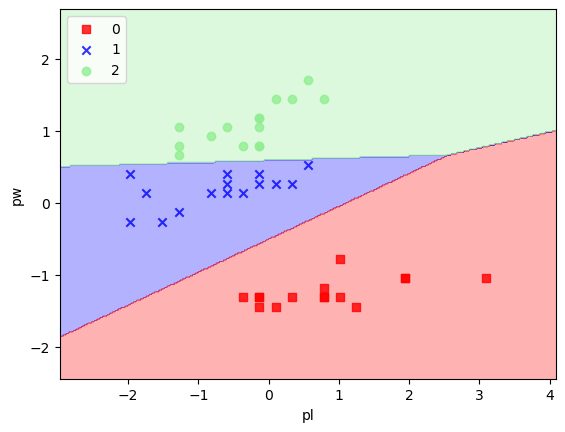

In [10]:
# Darstellung der Testdaten mit plot_decision_regions
plot_decision_regions (X=X_test, y=y_pred, classifier=model)

In [42]:
# Darstellung der des gesamten Datensatzes mit plot_decision_regions
from sklearn import svm
model = svm.SVC(gamma=0.001)
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(gamma=0.001, max_iter=3, random_state=1)

In [19]:
y_pred = model.predict(X_test)
richtig = y_pred==y_test
richtig.sum()
f'Da gibts {richtig.sum()} richtig vorhergesagt und {(y_test!=y_pred).sum()} falsch vorhergesagt'

'Da gibts 40 richtig vorhergesagt und 5 falsch vorhergesagt'

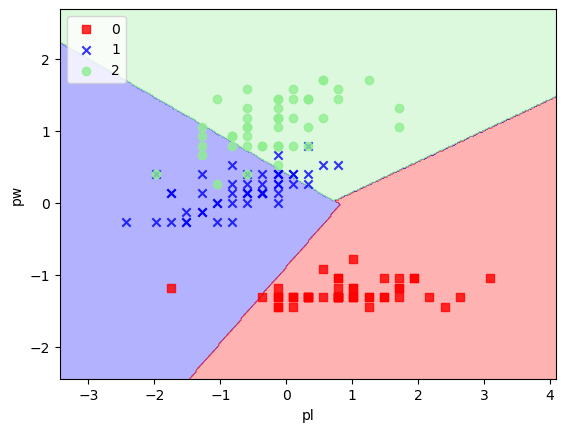

In [20]:
import numpy as np
X_combine = np.vstack((X_train, X_test))
Y_combine = np.hstack((Y_train, Y_test))
plot_decision_regions (X=X_combine, y=Y_combine, classifier=model)

In [21]:
X = iris.data[:150, [1,3]] #pl pw
# Labels (codes der Spalte species) in numpy-Array wandeln
Y = iris.target[:150]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [36]:
y_pred = tree.predict(X_test)
richtig = y_pred==y_test
richtig.sum()
f'Da gibts {richtig.sum()} richtig vorhergesagt und {(y_test!=y_pred).sum()} falsch vorhergesagt'

'Da gibts 44 richtig vorhergesagt und 1 falsch vorhergesagt'

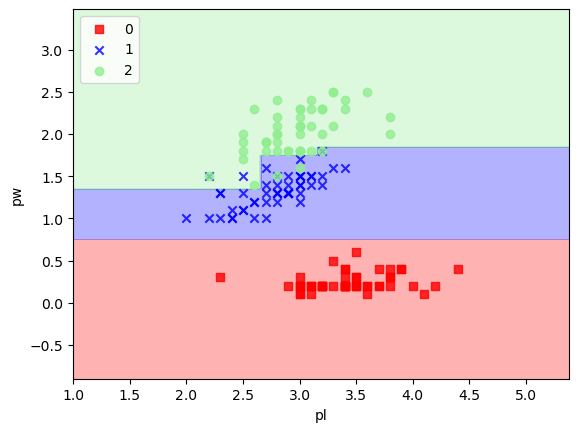

In [38]:
X_combine = np.vstack((X_train, X_test))
Y_combine = np.hstack((Y_train, Y_test))
plot_decision_regions (X=X_combine, y=Y_combine, classifier=tree)

In [39]:
from pydotplu